### K-means Clustering

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

**Training data**

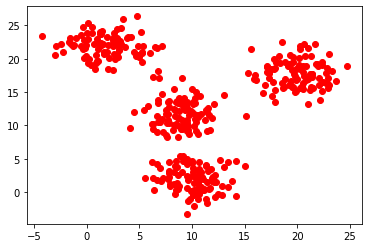

In [2]:
# synthetic data
mu1_act = np.array([2,22])
mu2_act = np.array([20,18])
mu3_act = np.array([9,12])
mu4_act = np.array([10,2])
sigma = np.array([[4,0],[0,4]])

X1 = np.random.multivariate_normal(mu1_act,sigma,100)
X2 = np.random.multivariate_normal(mu2_act,sigma,100)
X3 = np.random.multivariate_normal(mu3_act,sigma,100)
X4 = np.random.multivariate_normal(mu4_act,sigma,100)

X = np.concatenate((X1,X2,X3,X4),0)

# Plot sample data
plt.plot(X[:,0],X[:,1],'ro')
plt.show()

In [3]:
X[:5,:]

array([[ 5.28843991, 20.87660506],
       [ 6.45147731, 21.81971444],
       [ 6.72722242, 21.557458  ],
       [ 2.60981771, 23.88207016],
       [-1.6874491 , 22.49869878]])

**The k-means clustering algorithm:**

Randomly initialize $\mu_1, \ldots, \mu_k$

Repeat until convergence:
  - For $i \in 1..m$, let $c^{(i)} \leftarrow \mathrm{argmin}_j \|\mu_j - \mathbf{x}^{(i)} \|^{2}.$
  - For $j \in 1..k$, let $$ \mu_j \leftarrow \frac{\sum_i \delta(c^{(i)} = j) \mathbf{x}^{(i)}}{\sum_i \delta(c^{(i)} = j)}$$

The cost function minimized by k-means is
$$J(\mu) = \sum_{i=1}^m \| x^{(i)} - \mu_{c^{(i)}} \|^2$$

In [4]:
# Randomly initialize mu's by choosing k elements from X without replacement
# np.random.choice(): Generates a random sample from a given 1-D array
# replace=True: meaning that a value of a can be selected multiple times.
k1 = 4
m1 = X.shape[0]
indices1 = np.random.choice(np.arange(m1), k1, replace=False)
mu1 = X[indices1,:]
cold1 = np.zeros(m1)

In [5]:
cold1.shape,mu1.shape

((400,), (4, 2))

In [6]:
# axis 0 refers to the rows, and axis 1 refers to the columns
# axis=0. This means to sum row-wise, along axis 0. In other words, the output has the same size as this axis

$\|\mu_j - \mathbf{x}^{(i)} \|^{2} \rightarrow \small \text{distances}$

In [7]:
distances1 = np.zeros((k1,m1))
for j in range(k1):
        distances1[j,:] = ((mu1[j,:]-X)*(mu1[j,:]-X)).sum(axis=1).reshape(1,-1)

In [8]:
((mu1[j,:]-X)*(mu1[j,:]-X)).shape

(400, 2)

In [9]:
((mu1[j,:]-X)*(mu1[j,:]-X)).sum(axis=1).shape

(400,)

In [10]:
((mu1[j,:]-X)*(mu1[j,:]-X)).sum(axis=1).reshape(1,-1).shape

(1, 400)

In [11]:
distances1.shape,distances1.ndim

((4, 400), 2)

In [12]:
distances1[:,:3]

array([[276.55570496, 300.35737126, 290.03992328],
       [131.83826623, 146.50317109, 139.12038912],
       [147.95923249, 128.20919882, 120.4623226 ],
       [ 45.01816511,  57.77187968,  62.72321579]])

$c^{(i)} \leftarrow \mathrm{argmin}_j \|\mu_j - \mathbf{x}^{(i)} \|^{2}$

In [13]:
# Returns the indices of the minimum values along an axis = 0.
# C is index of class
C1 = np.argmin(distances1, axis=0)
type(C1),C1.shape,C1.ndim

(numpy.ndarray, (400,), 1)

In [14]:
C1

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0,

$J(\mu) = \sum_{i=1}^m \| x^{(i)} - \mu_{c^{(i)}} \|^2$

In [15]:
# Return the minimum along a given axis = 0.
J1 = np.min(distances1, axis=0).mean()
J1

15.048605801586016

In [16]:
np.min(distances1, axis=0)[:3],np.min(distances1, axis=0).shape

(array([45.01816511, 57.77187968, 62.72321579]), (400,))

$$ \mu_j \leftarrow \frac{\sum_i \delta(c^{(i)} = j) \mathbf{x}^{(i)}}{\sum_i \delta(c^{(i)} = j)}$$

In [17]:
mu1 = X[indices1,:]
mu1.shape,mu1

((4, 2),
 array([[ 9.13866553,  4.69848812],
        [ 8.80991396,  9.94785917],
        [17.09993927, 17.97010972],
        [-1.03945338, 23.10728472]]))

In [18]:
for j in range(k1):
    mu1[j,:] = X[C1==j,:].mean(axis=0)

In [19]:
X[C1==j,:].shape

(99, 2)

In [20]:
X[C1==j,:].mean(axis=0).shape

(2,)

In [21]:
mu1.shape

(4, 2)

In [22]:
while True:
    distances1 = np.zeros((k1,m1))
    
    # C <- argmin_j |mu_j - x_i|
    for j in range(k1):
        distances1[j,:] = ((mu1[j,:]-X)*(mu1[j,:]-X)).sum(axis=1).reshape(1,-1)
    C1 = np.argmin(distances1, axis=0)
    J1 = np.min(distances1, axis=0).mean() #Cost Function
    
    
     # mu_j = average of points closest to cluster j
    for j in range(k1):
        mu1[j,:] = X[C1==j,:].mean(axis = 0)
        
    # check convergence
    if (C1 == cold1).all():
        break
    cold1 = np.copy(C1)

In [23]:
mu1,J1

(array([[10.16382822,  1.92670851],
        [ 8.96765648, 11.71836732],
        [19.95327611, 17.77714135],
        [ 1.88731561, 21.89986162]]),
 7.591864572795486)

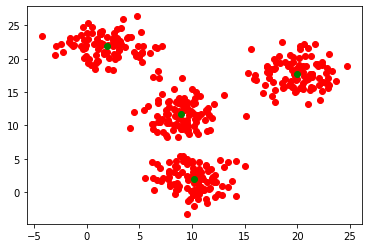

In [24]:
plt.plot(X[:,0],X[:,1],'ro')
plt.plot(mu1[:,0],mu1[:,1],'go')
plt.show()

**K-Means Function**

In [25]:
# K-means function
def k_means(X,k):
    # Initialize k cluster centroids
    m = X.shape[0]
    indices = np.random.choice(np.arange(m),k,replace=False)
    mu = X[indices,:]
    cold = np.zeros(m)
    # Repeat until convergence
    while True:
        distance = np.zeros((k,m))
        for j in range(k):
            distance[j,:] = ((mu[j,:]-X)*(mu[j,:]-X)).sum(axis=1).reshape(1,-1)
        C = np.argmin(distance, axis=0)
        J = np.min(distance, axis=0).mean()
        
        #Update parameter
        for j in range(k):
            mu[j,:] = X[C==j,:].mean(axis=0)
        
        #Check for convergence
        if (C==cold).all(): #Check if all items in a list are True
            break
        cold = np.copy(C)
    return mu,J

In [42]:
Mu,J = k_means(X,4)

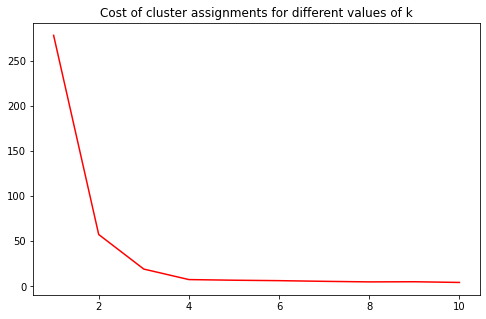

In [27]:
# Get cost of cluster assignments for different values of k
cost = []
for k  in range(1,11):
    Mu2,J2 = k_means(X,k)
    cost.append(J2)
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,11),cost,'r-')
plt.title('Cost of cluster assignments for different values of k')
plt.show()

In [39]:
# predict function
def kmeans_predict(X,mu):
    m = X.shape[0]
    k = mu.shape[0]
    results = np.zeros(m)
    for i in range(m):
        x = X[i,:]
        distance = np.zeros((k,1))
        for j in range(k):
            distance[j,:] = ((mu[j,:]-x)**2).sum()
        c = np.argmin(distance,axis=0)
        results[i] = c[0]
    return results

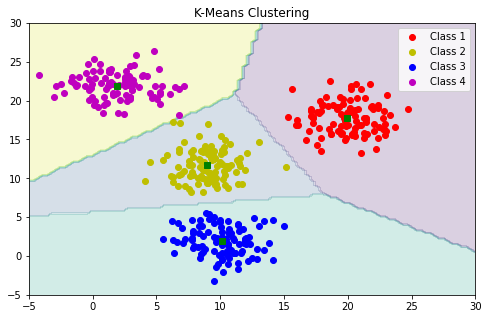

In [41]:
# Plot results
plt.figure(figsize=(8,5))

#color points
indices = kmeans_predict(X,Mu)
plt.plot(X[indices==0,0],X[indices==0,1],'ro',label='Class 1')
plt.plot(X[indices==1,0],X[indices==1,1],'yo',label='Class 2')
plt.plot(X[indices==2,0],X[indices==2,1],'bo',label='Class 3')
plt.plot(X[indices==3,0],X[indices==3,1],'mo',label='Class 4')

#color regions
grid_x,grid_y = np.mgrid[-5:30:100j,-5:30:100j]
grid_xy = np.vstack([grid_x.ravel(),grid_y.ravel()]).T
z = kmeans_predict(grid_xy,Mu).reshape((100,100))
plt.contourf(grid_x,grid_y,z,alpha = 0.2)

# Center points
plt.plot(Mu[:,0],Mu[:,1],'gs')

plt.title('K-Means Clustering')
plt.legend()
plt.show()

**Reference:**

[1]. https://www.dominodatalab.com/blog/getting-started-with-k-means-clustering-in-python

[2].https://machinelearningcoban.com/2017/01/01/kmeans/